### About Dataset  
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.  
 
You can even take this a step further and try and build a Regression model to predict Sales or Profit.  

Go crazy with the dataset, but also make sure to provide some business insights to improve.  

Metadata  
Row ID => Unique ID for each row.   
Order ID => Unique Order ID for each Customer.  
Order Date => Order Date of the product.  
Ship Date => Shipping Date of the Product.  
Ship Mode=> Shipping Mode specified by the Customer.  
Customer ID => Unique ID to identify each Customer.  
Customer Name => Name of the Customer.  
Segment => The segment where the Customer belongs.  
Country => Country of residence of the Customer.  
City => City of residence of of the Customer.  
State => State of residence of the Customer.  
Postal Code => Postal Code of every Customer.  
Region => Region where the Customer belong.  
Product ID => Unique ID of the Product.  
Category => Category of the product ordered.  
Sub-Category => Sub-Category of the product ordered.  
Product Name => Name of the Product  
Sales => Sales of the Product.  
Quantity => Quantity of the Product.  
Discount => Discount provided.  
Profit => Profit/Loss incurred.  

### Data From:  
https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
pd.set_option('display.float_format','{:.2f}'.format)

In [2]:
df = pd.read_csv('superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df[df.duplicated() == True]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [5]:
# Change Order Date and Ship Date Dtype to Datetime

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [6]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
# Check for oldest and newest Order Date
# Date format: YY/MM/DD

print(df['Order Date'].min().date())
print(df['Order Date'].max().date())

2014-01-03
2017-12-30


In [8]:
# Add quarter column

df['order_quarter'] = df['Order Date'].dt.quarter

In [9]:
# Add month column

df['order_month'] = df['Order Date'].dt.month

In [10]:
# Add year column

df['year'] = df['Order Date'].dt.year

In [11]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_quarter,order_month,year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,4,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,4,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2,6,2016


In [12]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'order_quarter', 'order_month', 'year'],
      dtype='object')

In [13]:
# Find the unique number of Customer ID

len(np.unique(df['Customer ID']))

793

In [14]:
# most order customer

df.groupby(['year', 'Customer ID']).agg({'Order Date': 'count'}).sort_values('Order Date', ascending = False).reset_index()

,year,Customer ID,Order Date
0,2016,EH-13765,21
1,2016,JD-15895,21
2,2017,SV-20365,20
3,2016,PP-18955,20
4,2017,JL-15835,20
...,...,...,...
2494,2015,ME-17320,1
2495,2017,FW-14395,1
2496,2014,RF-19735,1
2497,2015,ME-18010,1


In [15]:
df.groupby(['Category', 'Ship Mode']).agg({'Ship Mode': 'count'}) \
.rename(columns={'Ship Mode': 'Count'})\
.sort_values(by = ['Category', 'Count'], ascending = [True, False]).reset_index()

,Category,Ship Mode,Count
0,Furniture,Standard Class,1248
1,Furniture,Second Class,427
2,Furniture,First Class,327
3,Furniture,Same Day,119
4,Office Supplies,Standard Class,3638
5,Office Supplies,Second Class,1152
6,Office Supplies,First Class,910
7,Office Supplies,Same Day,326
8,Technology,Standard Class,1082
9,Technology,Second Class,366


Standard Class is the most popular Ship Mode.

### Sales and Profit Overview

In [43]:
# total = sum all from 2014-2017
# per_month = average per month for 48 months from 2014-2017

summary = pd.DataFrame(df.groupby(['Category', 'Sub-Category']).apply(
    lambda group: pd.Series({
        'total_sales': group['Sales'].sum(),
        'sales_per_month': f"{group['Sales'].sum()/48:.2f}",
        'total_quantity': group['Quantity'].sum(),
        'quantity_per_month': f"{group['Quantity'].sum()/48:.2f}",
        'total_Profit': group['Profit'].sum(),
        'profit_per_month': f"{group['Profit'].sum()/48:.2f}"  
    })
).reset_index())

summary

,Category,Sub-Category,total_sales,sales_per_month,total_quantity,quantity_per_month,total_Profit,profit_per_month
0,Furniture,Bookcases,114880.00,2393.33,868,18.08,-3472.56,-72.34
1,Furniture,Chairs,328449.10,6842.69,2356,49.08,26590.17,553.96
2,Furniture,Furnishings,91705.16,1910.52,3563,74.23,13059.14,272.07
3,Furniture,Tables,206965.53,4311.78,1241,25.85,-17725.48,-369.28
4,Office Supplies,Appliances,107532.16,2240.25,1729,36.02,18138.01,377.88
5,Office Supplies,Art,27118.79,564.97,3000,62.50,6527.79,136.00
6,Office Supplies,Binders,203412.73,4237.77,5974,124.46,30221.76,629.62
7,Office Supplies,Envelopes,16476.40,343.26,906,18.88,6964.18,145.09
8,Office Supplies,Fasteners,3024.28,63.01,914,19.04,949.52,19.78
9,Office Supplies,Labels,12486.31,260.13,1400,29.17,5546.25,115.55


The Furniture category's Bookcases and Tables have a negative profit, even though these two products have higher sales per month than Furnishings. This indicates that Bookcases and Tables might have high production costs. To reduce the negative profit, we might consider decreasing the production cost of these two products.  

Supplies is the only product with a negative profit in the Office Supplies category. It also has the lowest quantity of sales per month. To reduce the negative profit, we might consider finding ways to increase sales, such as launching a promotion to boost demand.

In the Technology category, there are no products with negative profit. However, Machines have the lowest profit per month. We might consider launching a promotion to boost sales or reducing production costs.

In [34]:
# Quantity analysis

df.groupby('Sub-Category').apply(
    lambda group: pd.Series({
        'total_quantity': group['Quantity'].sum(),
        'quantity_per_month': f"{group['Quantity'].sum()/48:.2f}",
        'min_per_month': group['Quantity'].min(),
        'max_per_month': group['Quantity'].max()
})).sort_values('max_per_month', ascending = False)

,total_quantity,quantity_per_month,min_per_month,max_per_month
Sub-Category,,,,
Accessories,2976,62.00,1,14
Appliances,1729,36.02,1,14
Storage,3158,65.79,1,14
Phones,3289,68.52,1,14
Paper,5178,107.88,1,14
Labels,1400,29.17,1,14
Furnishings,3563,74.23,1,14
Fasteners,914,19.04,1,14
Chairs,2356,49.08,1,14


This table indicates the quantity of each product that should be produced per month.

In [44]:
# Overall by category

df.groupby('Category').apply(
    lambda group: pd.Series({
        'total_sales': group['Sales'].sum(),
        'sales_per_month': f"{group['Sales'].sum()/48:.2f}",
        'total_quantity': group['Quantity'].sum(),
        'quantity_per_month': f"{group['Quantity'].sum()/48:.2f}",
        'total_Profit': group['Profit'].sum(),
        'profit_per_month': f"{group['Profit'].sum()/48:.2f}"  
    })
).reset_index()

,Category,total_sales,sales_per_month,total_quantity,quantity_per_month,total_Profit,profit_per_month
0,Furniture,741999.80,15458.33,8028,167.25,18451.27,384.40
1,Office Supplies,719047.03,14980.15,22906,477.21,122490.80,2551.89
2,Technology,836154.03,17419.88,6939,144.56,145454.95,3030.31


Overall, Furniture is the category with the lowest profit.

In [45]:
# Sales and Profit by state

df.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Profit', ascending = True).reset_index()

,State,Sales,Profit
0,Texas,170188.05,-25729.36
1,Ohio,78258.14,-16971.38
2,Pennsylvania,116511.91,-15559.96
3,Illinois,80166.10,-12607.89
4,North Carolina,55603.16,-7490.91
5,Colorado,32108.12,-6527.86
6,Tennessee,30661.87,-5341.69
7,Arizona,35282.00,-3427.92
8,Florida,89473.71,-3399.30
9,Oregon,17431.15,-1190.47


Ten out of 49 states have a negative profit. We might consider closing some branches in states with negative profit or launching a promotion to attract more customers and boost sales.

In [46]:
# Top 5 selling products by sales

df.groupby('Product Name').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending = False).head(5).reset_index()

,Product Name,Sales,Profit
0,Canon imageCLASS 2200 Advanced Copier,61599.82,25199.93
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,7753.04
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48,-1811.08
3,HON 5400 Series Task Chairs for Big and Tall,21870.58,0.00
4,GBC DocuBind TL300 Electric Binding System,19823.48,2233.51


In [47]:
# Top 5 selling products by profit

df.groupby('Product Name').agg({'Profit': 'sum', 'Sales': 'sum'}).sort_values('Profit', ascending = False).head(5).reset_index()

,Product Name,Profit,Sales
0,Canon imageCLASS 2200 Advanced Copier,25199.93,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.04,27453.38
2,Hewlett Packard LaserJet 3310 Copier,6983.88,18839.69
3,Canon PC1060 Personal Laser Copier,4570.93,11619.83
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.98,18374.90


#### Graph and Visualization

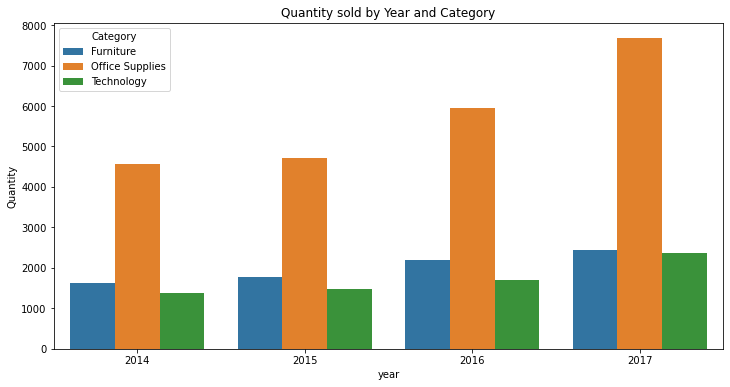

In [17]:
# Quantity sold by year and category

quan = pd.DataFrame(df.groupby(['year','Category']).agg({'Quantity': 'sum'}).reset_index())

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='year', y='Quantity', hue='Category', data=quan);

plt.title('Quantity sold by Year and Category');

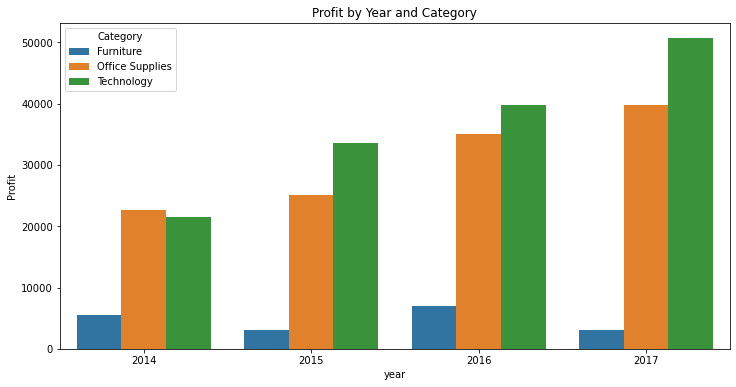

In [18]:
# Profit by year and category

prof = pd.DataFrame(df.groupby(['year','Category']).agg({'Profit': 'sum'}).reset_index())

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='year', y='Profit', hue='Category', data=prof);

plt.title('Profit by Year and Category');

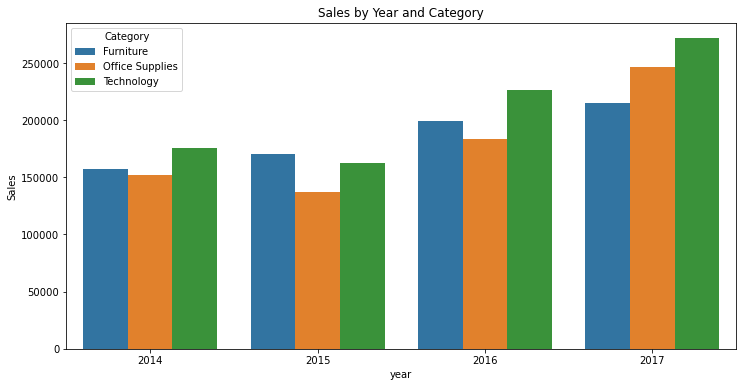

In [19]:
# Sales by year and category

sale = pd.DataFrame(df.groupby(['year','Category']).agg({'Sales': 'sum'}).reset_index())

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='year', y='Sales', hue='Category', data=sale);

plt.title('Sales by Year and Category');

Technology has the highest profit and sales in most years and office suppplies has the highest quantity sold every year.

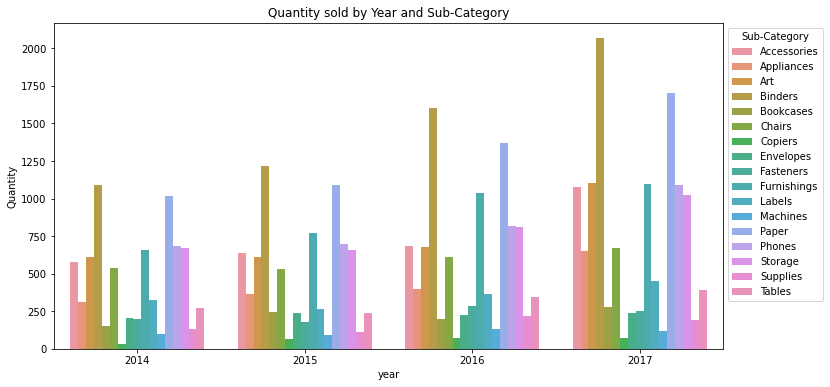

In [20]:
# Quantity by year and sub-category

quan_sub = pd.DataFrame(df.groupby(['year','Sub-Category']).agg({'Quantity': 'sum'}).reset_index())
quan_sub

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='year', y='Quantity', hue='Sub-Category', data=quan_sub);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Sub-Category');

plt.title('Quantity sold by Year and Sub-Category');

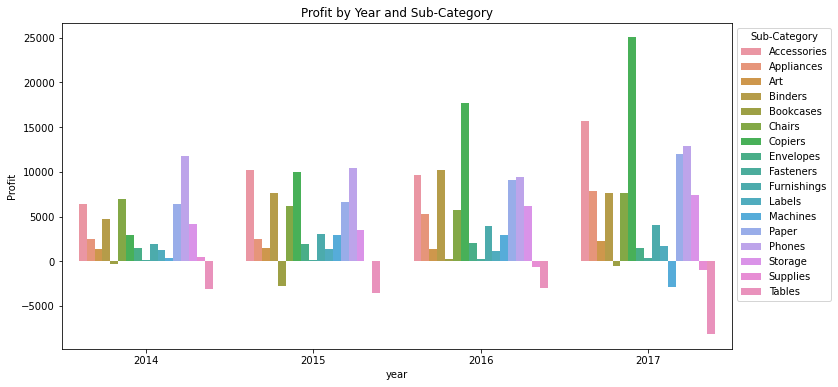

In [21]:
# Profit by year and sub-category

prof_sub = pd.DataFrame(df.groupby(['year','Sub-Category']).agg({'Profit': 'sum'}).reset_index())
prof_sub

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='year', y='Profit', hue='Sub-Category', data=prof_sub);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Sub-Category');

plt.title('Profit by Year and Sub-Category');

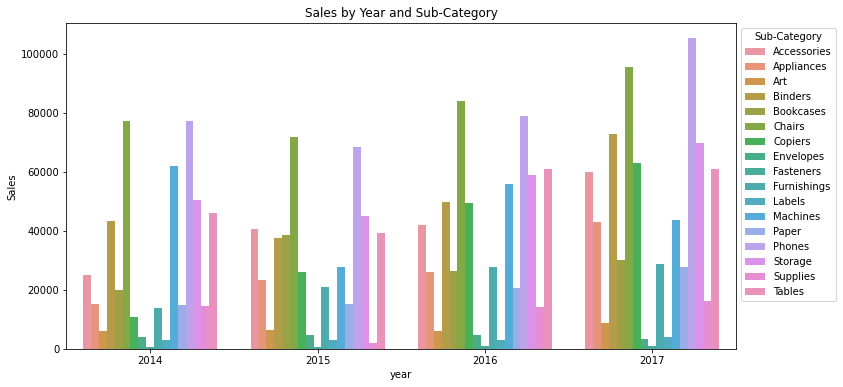

In [22]:
# Sales by year and sub-category

sales_sub = pd.DataFrame(df.groupby(['year','Sub-Category']).agg({'Sales': 'sum'}).reset_index())
sales_sub

plt.figure(figsize=(12, 6))
ax = sns.barplot(x = 'year', y = 'Sales', hue = 'Sub-Category', data = sales_sub);
ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1), title = 'Sub-Category');

plt.title('Sales by Year and Sub-Category');

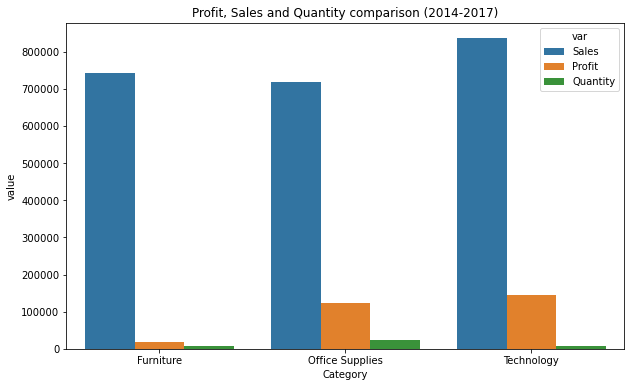

In [23]:
# Overall Profit vs Sales (2014-2017)

prof_sale = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

prof_sale_melt = prof_sale.melt(id_vars = ['Category'],
                               value_vars = ['Sales', 'Profit', 'Quantity'],
                               var_name = 'var',
                               value_name = 'value')

plt.figure(figsize=(10,6))
sns.barplot(x='Category', y = 'value', hue='var', data = prof_sale_melt);

plt.title('Profit, Sales and Quantity comparison (2014-2017)');

The bar graph indicates that, although furniture had higher sales than office supplies, the profit shows the contrary, with office supplies having higher profit.

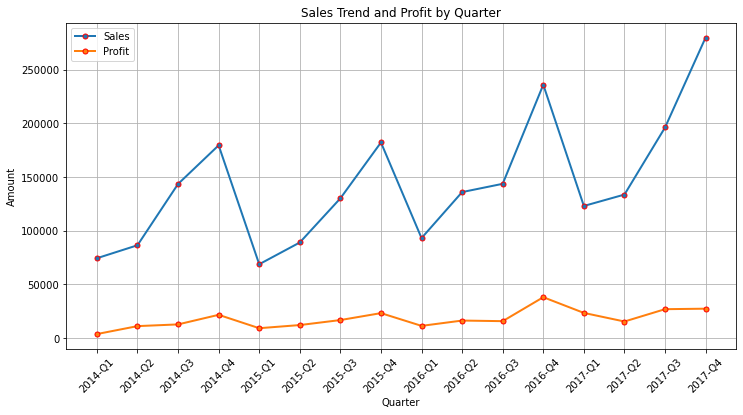

In [24]:
# Overall Sales Trend, Profit and Quantity by quarter (2014-2017)

quarter = pd.DataFrame(df.groupby(['year', 'order_quarter']).agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index())

quarter['year_quarter'] = quarter['year'].astype(str) + '-Q' + quarter['order_quarter'].astype(str)
x = quarter['year_quarter'] 
y = quarter['Sales']
y2 = quarter['Profit']

plt.figure(figsize=(12, 6))
plt.title('Sales Trend and Profit by Quarter')

plt.plot(x, y, label='Sales', linewidth=2, marker='.', markersize=10, markeredgecolor='red')
plt.plot(x, y2, label='Profit', linewidth=2, marker='.', markersize=10, markeredgecolor='red')
plt.xticks(rotation=45)
plt.xlabel('Quarter')
plt.ylabel('Amount')
plt.grid(True)
plt.legend();

In [25]:
df.groupby('order_quarter').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

,order_quarter,Sales,Profit,Quantity
0,1,359681.5758,48023.7440,5106
1,2,445509.6196,55284.5395,7918
2,3,613932.1057,72467.0785,10551
3,4,878077.5592,110621.6597,14298


Quarter 4 has the highest sales and Profit.

In [26]:
# Sales trend and Profit by Month (2014-2017)

month = pd.DataFrame(df.groupby(['year','order_month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index())
month

,year,order_month,Sales,Profit
0,2014,1,14236.8950,2450.1907
1,2014,2,4519.8920,862.3084
2,2014,3,55691.0090,498.7299
3,2014,4,28295.3450,3488.8352
4,2014,5,23648.2870,2738.7096
5,2014,6,34595.1276,4976.5244
6,2014,7,33946.3930,-841.4826
7,2014,8,27909.4685,5318.1050
8,2014,9,81777.3508,8328.0994
9,2014,10,31453.3930,3448.2573


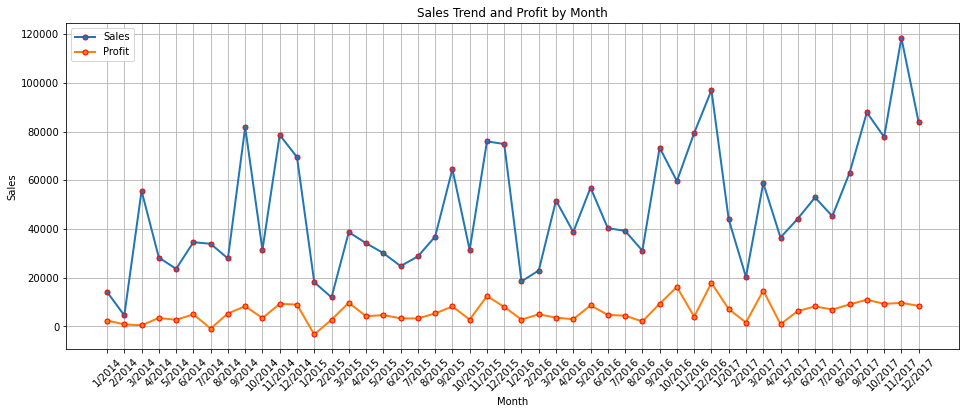

In [27]:
month['month'] = month['order_month'].astype(str) + '/'+ month['year'].astype(str)
x = month['month']
y = month['Sales']
y2 = month['Profit']

plt.figure(figsize=(16, 6))
plt.title('Sales Trend and Profit by Month')
plt.plot(x, y, label = 'Sales', linewidth = 2, marker = '.', markersize = '10', markeredgecolor = 'red');
plt.plot(x, y2, label = 'Profit',linewidth = 2, marker = '.', markersize = '10', markeredgecolor = 'red');

plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Month');
plt.ylabel('Sales');
plt.grid(True)